Yao et al., 2013

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
from cdasws import CdasWs
cdas = CdasWs()

TIME_RANGE = [datetime(1995, 2, 4, 13, 50), datetime(1995, 2, 4, 14, 10)]

_, proton_data = cdas.get_data(dataset='WI_PM_3DP', variables=['P_DENS', 'P_VELS', 'P_TEMP'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])
_, mag_data = cdas.get_data(dataset='WI_H0_MFI', variables=['B3GSE'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])

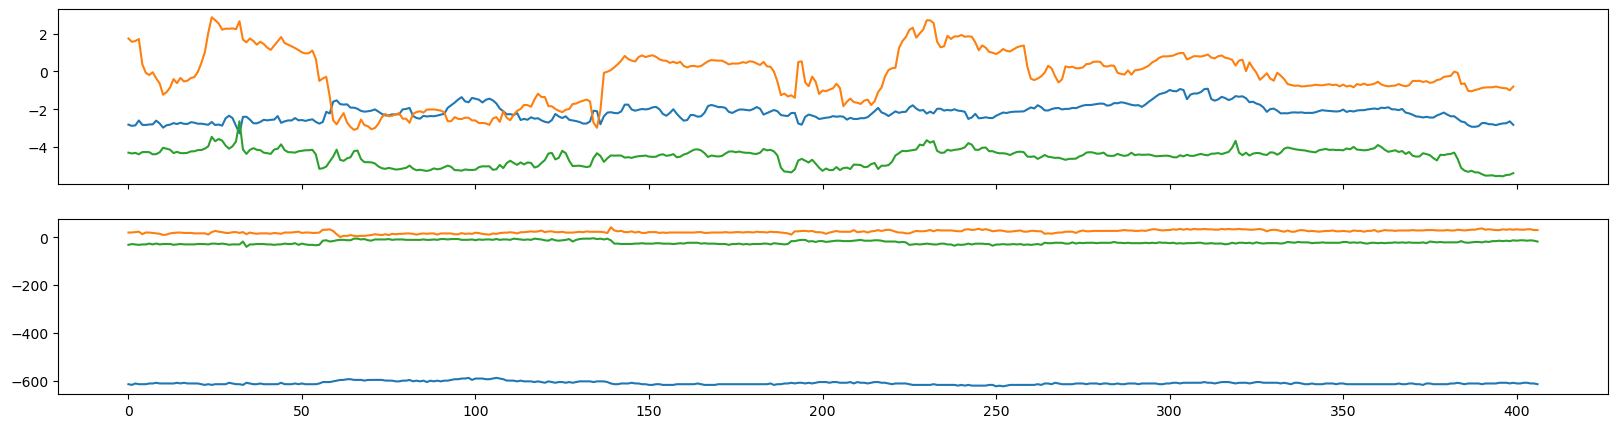

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)
ax[0].plot(mag_data['B3GSE'])
ax[1].plot(proton_data['P_VELS'])

In [3]:
from astropy import units as u

u.set_enabled_aliases({'sec': u.s, '#': u.dimensionless_unscaled})

from datetime import timedelta
import spcphys_common_functions as scf

alfven_params_interpolate = scf.alfvenic_parameters.calc_alfven_t(
    p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
    n=proton_data['P_DENS'].values * u.cm**-3, 
    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
    b=mag_data['B3GSE'].values * u.nT, 
    window_size=timedelta(seconds=90), 
    step=timedelta(seconds=3), 
    start_time=TIME_RANGE[0]
    )

Calculating Alfvenic Parameters: 100%|██████████| 370/370 [00:06<00:00, 53.96it/s]


In [6]:
alfven_params_mean = scf.alfvenic_parameters.calc_alfven_t(
    p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
    n=proton_data['P_DENS'].values * u.cm**-3, 
    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
    b=mag_data['B3GSE'].values * u.nT, 
    down_sampling_method='mean',
    window_size=timedelta(seconds=90), 
    step=timedelta(seconds=3), 
    start_time=TIME_RANGE[0]
    )

Calculating Alfvenic Parameters: 100%|██████████| 370/370 [00:05<00:00, 73.13it/s]


Text(0, 0.5, 'alfven speed')

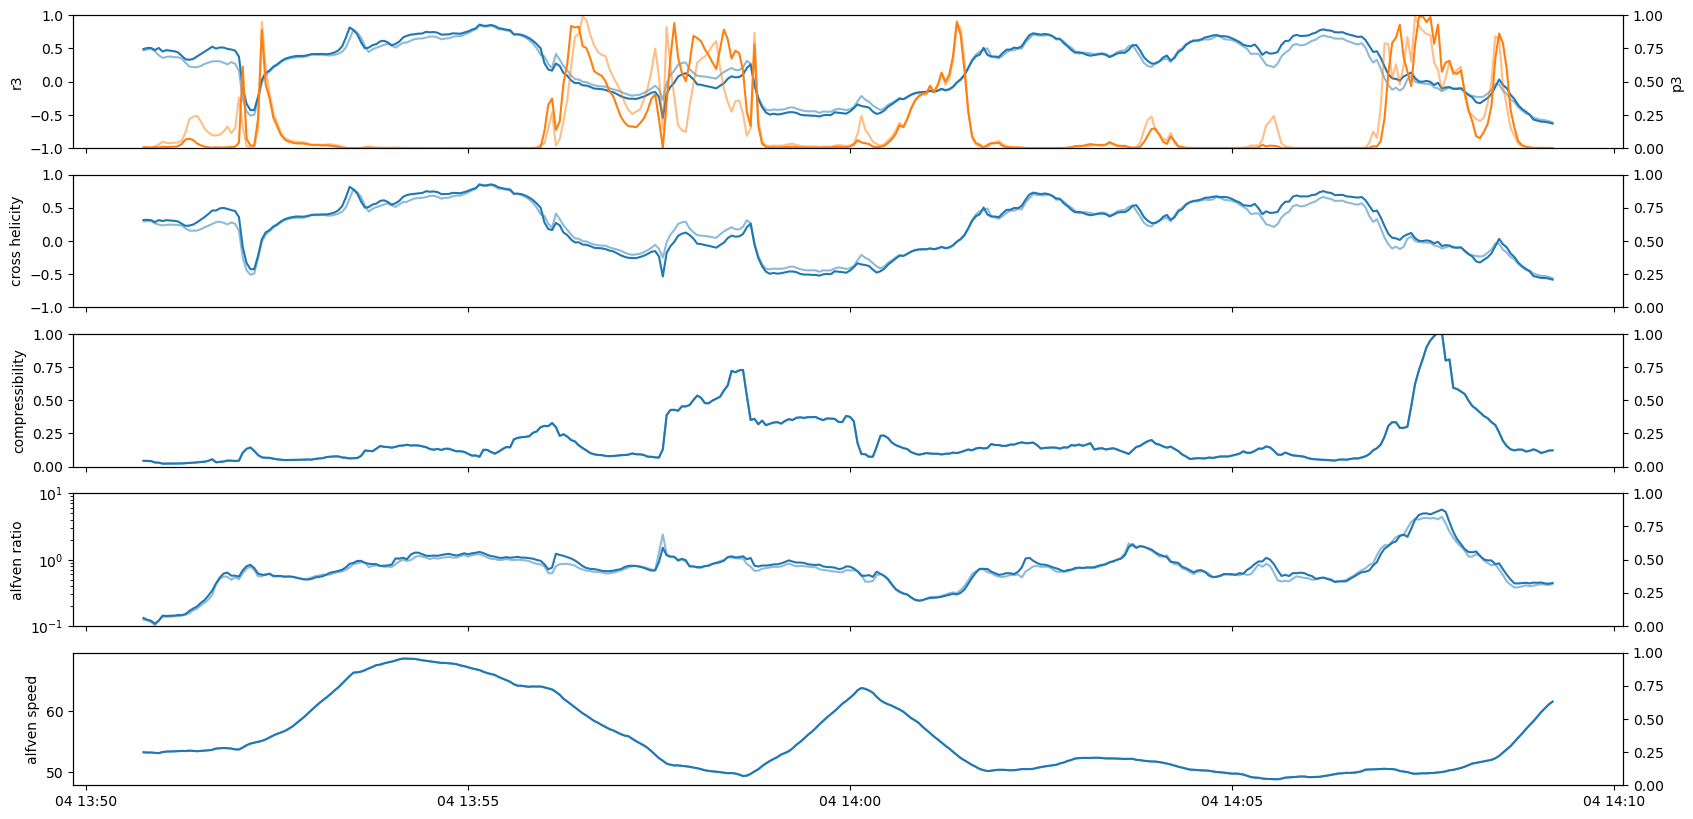

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5, 1, figsize = (20, 10), sharex=True)
twinx = [ax_i.twinx() for ax_i in ax]

ax[0].plot(alfven_params_interpolate['time'], alfven_params_interpolate['r3'])
ax[0].plot(alfven_params_mean['time'], alfven_params_mean['r3'], c='C0', alpha=0.5)
ax[0].set_ylabel('r3')
ax[0].set_ylim(-1, 1)
twinx[0].plot(alfven_params_interpolate['time'], alfven_params_interpolate['p3'], c='C1')
twinx[0].plot(alfven_params_mean['time'], alfven_params_mean['p3'], c='C1', alpha=0.5)
twinx[0].set_ylabel('p3')
twinx[0].set_ylim(0, 1)
ax[1].plot(alfven_params_interpolate['time'], alfven_params_interpolate['cross_helicity'])
ax[1].plot(alfven_params_mean['time'], alfven_params_mean['cross_helicity'], c='C0', alpha=0.5)
ax[1].set_ylabel('cross helicity')
ax[1].set_ylim(-1, 1)
ax[2].plot(alfven_params_interpolate['time'], alfven_params_interpolate['compressibility'])
ax[2].plot(alfven_params_mean['time'], alfven_params_mean['compressibility'], c='C0', alpha=0.5)
ax[2].set_ylabel('compressibility')
ax[2].set_ylim(0, 1)
ax[3].semilogy(alfven_params_interpolate['time'], alfven_params_interpolate['alfven_ratio'])
ax[3].semilogy(alfven_params_mean['time'], alfven_params_mean['alfven_ratio'], c='C0', alpha=0.5)
ax[3].set_ylabel('alfven ratio')
ax[3].set_ylim(0.1, 10)
ax[4].plot(alfven_params_interpolate['time'], alfven_params_interpolate['vA'].to(u.km/u.s))
ax[4].plot(alfven_params_mean['time'], alfven_params_mean['vA'].to(u.km/u.s), c='C0', alpha=0.5)
ax[4].set_ylabel('alfven speed')

In [4]:
alfven_param = scf.alfvenic_parameters.calc_alfven(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
                                                    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
                                                    n=proton_data['P_DENS'].values * u.cm**-3, 
                                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
                                                    b=mag_data['B3GSE'].values * u.nT, )
alfven_param

{'time': datetime.timedelta(seconds=1197, microseconds=210000),
 'r3': <Quantity 0.09493716>,
 'p3': <Quantity 0.05565608>,
 'residual_energy': <Quantity -0.26211381>,
 'cross_helicity': <Quantity 0.09161788>,
 'alfven_ratio': <Quantity 0.58464319>,
 'compressibility': <Quantity 0.08279211>,
 'vA': <Quantity 55624.9296875 m / s>,
 'time_window': [datetime.datetime(1995, 2, 4, 13, 50, 0, 965000),
  datetime.datetime(1995, 2, 4, 13, 50, 3, 914000)],
 'num_valid_p_points': 407,
 'num_valid_b_points': 400}